<a href="https://colab.research.google.com/github/letrang255/review-analysis/blob/aspect-analysis/lda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load packages and install

In [0]:
!pip install pyvi

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.3MB 3.9MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 757kB 40.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/49/44/c1/56344a2e33862991f04fdbacc8b8369bfc597723e63cdf17ea
Successfully built pyvi


In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑
Mounted at /content/drive


In [0]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pyvi import ViTokenizer, ViPosTagger

import re
import string

from os import listdir
from os.path import isfile, join
from ipywidgets import interact
pd.set_option('max_colwidth', 150)

import gensim
from gensim import corpora, models
from gensim.models.phrases import Phrases, Phraser


# Preprocessing Function

In [0]:
# my_regex = r'[^qwertyuiopasdfghjklzxcvbnm_ ƒë√°√†a√£·∫£·∫°ƒÉ·∫Ø·∫±·∫≥·∫µ·∫∑√¢·∫•·∫ß·∫©·∫´·∫≠√≥√≤·ªè√µ·ªç√¥·ªë·ªì·ªï·ªô·ªó∆°·ªõ·ªù·ªü·ª°·ª£√∫√π·ªß≈©·ª•∆∞·ª©·ª´·ªØ·ª±·ª≠i√≠√¨·ªâƒ©·ªãy√Ω·ª≥·ª∑·ªπ·ªµe√©√®·∫ª·∫Ω·∫π√™·∫ø·ªÅ·ªÉ·ªÖ·ªá,;.?!1234567890]'

false_mark = ' ÃÅ'[1] + ' ÃÄ'[1] + ' Ãâ'[1] + ' Ã£'[1] + ' ÃÉ'[1]
vietnam_alp = '√°√†√£·∫£·∫°ƒÉ·∫Ø·∫±·∫≥·∫µ·∫∑√¢·∫•·∫ß·∫©·∫´·∫≠√≥√≤·ªè√µ·ªç√¥·ªë·ªì·ªï·ªô·ªó∆°·ªõ·ªù·ªü·ª°·ª£√∫√π·ªß≈©·ª•∆∞·ª©·ª´·ªØ·ª±·ª≠√≠√¨·ªâƒ©·ªã√Ω·ª≥·ª∑·ªπ·ªµ√©√®·∫ª·∫Ω·∫π√™·∫ø·ªÅ·ªÉ·ªÖ·ªá'
my_regex_2 = r'(?P<mark>[√°√†√£·∫£·∫°·∫Ø·∫±·∫≥·∫µ·∫∑·∫•·∫ß·∫©·∫´·∫≠√≥√≤·ªè√µ·ªç·ªë·ªì·ªï·ªô·ªó·ªõ·ªù·ªü·ª°·ª£√∫√π·ªß≈©·ª•·ª©·ª´·ªØ·ª±·ª≠√≠√¨·ªâƒ©·ªã√Ω·ª≥·ª∑·ªπ·ªµ√©√®·∫ª·∫Ω·∫π·∫ø·ªÅ·ªÉ·ªÖ·ªá]) (?P<word>([a-z][a-z][_.,;!?]* )|([a-z][_.,;!?]* )|([a-z][a-z][.,;!?])|([a-z][[.,;!?]]))'
my_regex_3 = r'[^\w\s,;.?!_]'


def preprocessing(comment):
  """
  This function will remove all special character except commas and full stop. 
  """
    
  #Convert to lower case , so that Hi and hi are the same
  comment = comment.lower()
  
  # Remove False Mark String 
  if any ( c in false_mark for c in comment):
     comment = recompile_false_mark(comment)

  
  # remove \n and tags 
  comment = re.sub(r'< a.*\/a>',"",comment)
  comment = re.sub("\\n", " ", comment)
  comment = re.sub(" _ ", "", comment)
  
  # remove numbers
  comment = re.sub(r'[0-9]*', "", comment)
  
  # replace some abbreviation
  comment = re.sub(r' k | ko ', " kh√¥ng ", comment)
  comment = re.sub(r' dc | ƒëc ', " ƒë∆∞·ª£c ", comment)
  
  # remove special characters 
  comment = re.sub(r'[+\-"():,\\\/\^<>]',"",comment)
  # Remove Icons
  comment = re.sub(my_regex_3,"",comment)
  
  # remove blank space at the start and end of each comment
  comment = comment.strip()
  
  return comment


def recompile_false_mark(string):
  """ 
    Recomplie False Mark
  """
  
  string =  re.sub('a ÃÅ','√°',string)  
  string =  re.sub('a ÃÄ','√†',string)  
  string =  re.sub('a Ãâ','·∫£',string)
  string =  re.sub('a Ã£','·∫°',string)  
  string =  re.sub('a ÃÉ','√£',string) 
  
  string =  re.sub('ƒÉ ÃÅ','·∫Ø',string)  
  string =  re.sub('ƒÉ ÃÄ','·∫±',string)  
  string =  re.sub('ƒÉ Ãâ','·∫≥',string)
  string =  re.sub('ƒÉ Ã£','·∫∑',string)  
  string =  re.sub('ƒÉ ÃÉ','·∫µ',string)  
  
  string =  re.sub('√¢ ÃÅ','·∫•',string)  
  string =  re.sub('√¢ ÃÄ','·∫ß',string)  
  string =  re.sub('√¢ Ãâ','·∫≠',string)
  string =  re.sub('√¢ ÃÉ','·∫´',string)  
  string =  re.sub('√¢ Ã£','·∫≠',string)  
  
  string =  re.sub('o ÃÅ','√≥',string)  
  string =  re.sub('o ÃÄ','√≤',string)  
  string =  re.sub('o Ãâ','·ªè',string)
  string =  re.sub('o ÃÉ','√µ',string)  
  string =  re.sub('o Ã£','·ªç',string)  
  
  string =  re.sub('√¥ ÃÅ','·ªë',string)  
  string =  re.sub('√¥ ÃÄ','·ªì',string)  
  string =  re.sub('√¥ Ãâ','·ªï',string)
  string =  re.sub('√¥ ÃÉ','·ªó',string)  
  string =  re.sub('√¥ Ã£','·ªô',string)
  
  string =  re.sub('∆° ÃÅ','·ªõ',string)  
  string =  re.sub('∆° ÃÄ','·ªù',string)  
  string =  re.sub('∆° Ãâ','·ªü',string)
  string =  re.sub('∆° ÃÉ','·ª°',string)  
  string =  re.sub('∆° Ã£','·ª£',string)

  string =  re.sub('u ÃÅ','√∫',string)  
  string =  re.sub('u ÃÄ','√π',string)  
  string =  re.sub('u Ãâ','·ªß',string)
  string =  re.sub('u ÃÉ','≈©',string)  
  string =  re.sub('u Ã£','·ª•',string)
  
  string =  re.sub('∆∞ ÃÅ','·ª©',string)  
  string =  re.sub('∆∞ ÃÄ','·ª´',string)  
  string =  re.sub('∆∞ Ãâ','·ª≠',string)
  string =  re.sub('∆∞ ÃÉ','·ªØ',string)  
  string =  re.sub('∆∞ Ã£','·ª±',string)
  
  string =  re.sub('i ÃÅ','√≠',string)  
  string =  re.sub('i ÃÄ','√¨',string)  
  string =  re.sub('i Ãâ','·ªâ',string)
  string =  re.sub('i ÃÉ','ƒ©',string)  
  string =  re.sub('i Ã£','·ªã',string)
  
  string =  re.sub('y ÃÅ','√Ω',string)  
  string =  re.sub('y ÃÄ','·ª≥',string)  
  string =  re.sub('y Ãâ','·ª∑',string)
  string =  re.sub('y ÃÉ','·ªπ',string)  
  string =  re.sub('y Ã£','·ªµ',string)
  
  string =  re.sub('e ÃÅ','√©',string)  
  string =  re.sub('e ÃÄ','√®',string)  
  string =  re.sub('e Ãâ','·∫ª',string)
  string =  re.sub('e ÃÉ','·∫Ω',string)  
  string =  re.sub('e Ã£','·∫π',string)
  
  string =  re.sub('√™ ÃÅ','·∫ø',string)  
  string =  re.sub('√™ ÃÄ','·ªÅ',string)  
  string =  re.sub('√™ Ãâ','·ªÉ',string)
  string =  re.sub('√™ ÃÉ','·ªÖ',string)  
  string =  re.sub('√™ Ã£','·ªá',string)
  
  string = re.sub(my_regex_2,'\g<mark>\g<word> ',string)
  return string

In [0]:
def is_false_mark(string):
  """
    True if string is false mark. 
  """
  return (any ( c in false_mark for c in string))
    
  
def is_have_mark(string):
  """
    False if string is not have mark 
  """
  return (any ( c in vietnam_alp for c in string))

def find_false_mark(df, col):
  false_mark_indices = []
  for index, row in df.iterrows():
    if is_false_mark(row[col].lower()):
      false_mark_indices.append(index)
  return false_mark_indices

def find_not_having_mark(df, col):
  not_have_mark_indices = []
  for index, row in df.iterrows():
    if not is_have_mark(row[col].lower()):
      not_have_mark_indices.append(index)
  return not_have_mark_indices

def remove_false_mark_not_having_mark(df, origin_review_col):
  false_mark_indices = find_false_mark(df, origin_review_col)
  not_have_mark_indices = find_not_having_mark(df, origin_review_col)
  print("False mark: {}, take {}%".format(len(false_mark_indices)
                                        , len(false_mark_indices)/len(df) * 100))
  print("Don't have mark: {}, take {}%".format(len(not_have_mark_indices)
                                             , len(not_have_mark_indices)/len(df) * 100))
  
  removed_indices = np.concatenate((false_mark_indices, not_have_mark_indices))
  df.drop(index=removed_indices, inplace=True)
  df.reset_index(drop=True, inplace=True)

In [0]:
def df_interact(df, num_col):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 5, col:col + num_col]
    interact(peek, row=(0, len(df), 5), col=(0, len(df.columns) - num_col))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

## Tokenize, split dataframe and detect aspect

In [0]:
# tokenize reviews

def tokenize_comment(comment):
  # tokenize comment
  comment = ViTokenizer.tokenize(comment)
  # split sentence
  split_sentence = re.split("\\;|\\.|\\!|\\?", comment)
  list_sentence = []
  for sentence in split_sentence:
    word_list = sentence.split()
    # remove stop words from each sentence
    word_list_new = [word for word in word_list]
    # if a sentence have only two or fewer words, append it to previous sentence
    if len(word_list_new) <= 2 and len(list_sentence) != 0:
      list_sentence[-1] = list_sentence[-1] + word_list_new
    else:
      list_sentence.append(word_list_new)
  return list_sentence

In [0]:
# split dataframe with tokenized comment into separated sentences
def split_dataframe(df, col):
  list_token = []
  for idx, token in df[col].iteritems():
    index = [idx for i in token]
    sentence = [" ".join(tk) for tk in token]
    token = [tk for tk in token]
    index_token = [list(a) for a in zip(index, sentence, token)]
    list_token = list_token + index_token
  split_df = pd.DataFrame(list_token, columns = ['id', 'sentence', 'token'])
  split_df.reset_index(drop = True, inplace = True)
  return split_df
def remove_stopword(df, col, stop_words):
  df[col+str('_no_stop_word')] = df[col].apply(lambda review: [i for i in review if i not in stop_words])

In [0]:
def train_bigram_model(df, col, min_count):
  words = [sentence.split() for sentence in df[col]]
  print("Train bi-gram model...")
  phrases = Phrases(words, min_count=min_count)
  bigram = Phraser(phrases)
  return bigram

def combine_words(review, bigram_model):
  words = review.split()
  new_review = " ".join(bigram_model[words])
  return new_review

#LDA functions

In [0]:
# generate lda model
def lda_model(df, col, num_topics, passes = 2, workers = 4):
  dictionary = corpora.Dictionary(df[col])
  bow_corpus = [dictionary.doc2bow(doc) for doc in df[col]]
  tfidf = models.TfidfModel(bow_corpus)
  corpus_tfidf = tfidf[bow_corpus]
  lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics = num_topics, id2word = dictionary, passes = passes, workers = workers)
  for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))
  return lda_model, dictionary

In [0]:
# save model and dictionary
save_path = 'drive/My Drive/QCF/Project_AdvMLDM/lda_tfidf_trang'
def save_lda_model(model, dictionary, path):
  model.save(path + "/" + str(model))
  dictionary.save_as_text(path + "/" + str(dictionary))
# save dataframe
def save_df(df, path, name):
  df.to_pickle(path + "/" + name +('.pkl'))

In [0]:
# generate topic from lda model
def topic_gen(sentence, model, dictionary, map_to_topic):
  topic = sorted(model.get_document_topics(dictionary.doc2bow(sentence)),key = lambda x: x[1], reverse = True)[0][0]
  return map_to_topic[topic]

# Labeled data

## Load data and unzip

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 993kB 4.7MB/s 


In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# load data and unzip
fid = drive.ListFile({'q':"title='data_train.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('data_train.zip')
!unzip data_train.zip

Archive:  data_train.zip
   creating: data_train/
   creating: data_train/test/
   creating: data_train/test/neg/
  inflating: data_train/test/neg/10013.txt  
  inflating: data_train/test/neg/10017.txt  
  inflating: data_train/test/neg/10031.txt  
  inflating: data_train/test/neg/10049.txt  
  inflating: data_train/test/neg/10056.txt  
  inflating: data_train/test/neg/10060.txt  
  inflating: data_train/test/neg/10062.txt  
  inflating: data_train/test/neg/10066.txt  
  inflating: data_train/test/neg/10073.txt  
  inflating: data_train/test/neg/10081.txt  
  inflating: data_train/test/neg/10091.txt  
  inflating: data_train/test/neg/10099.txt  
  inflating: data_train/test/neg/101.txt  
  inflating: data_train/test/neg/10105.txt  
  inflating: data_train/test/neg/10110.txt  
  inflating: data_train/test/neg/10125.txt  
  inflating: data_train/test/neg/10131.txt  
  inflating: data_train/test/neg/10135.txt  
  inflating: data_train/test/neg/1014.txt  
  inflating: data_train/test/neg/1

## Read data





In [0]:
d = [] 
pospath = 'data_train/train/pos'
negpath = 'data_train/train/neg'

for filename in listdir(pospath):
  f = open(join(pospath, filename), "r")
  d.append([str(f.read()),str(filename),1])
  
for filename in listdir(negpath):
  f = open(join(negpath, filename), "r")
  d.append([str(f.read()),str(filename),0])

labeled_df = pd.DataFrame(data = d, columns=['Comment', 'FileName', 'Label'])
df_interact(labeled_df, 3)

interactive(children=(IntSlider(value=0, description='row', max=30000, step=5), IntSlider(value=0, description‚Ä¶

(30000 rows, 3 columns) total


In [0]:
labeled_df = labeled_df.drop(["FileName"], axis = 1)
labeled_df["Comment"] = labeled_df["Comment"].apply(lambda Comment: preprocessing(Comment))

df_interact(labeled_df, 2)

interactive(children=(IntSlider(value=0, description='row', max=30000, step=5), IntSlider(value=0, description‚Ä¶

(30000 rows, 2 columns) total


In [0]:
labeled_df["Comment_token"] = labeled_df["Comment"].apply(lambda Comment: tokenize_comment(Comment))
labeled_df.head()

Comment  ...                                                                                                                                          Comment_token
0  qu√°n n√†y v·ªõi qu√°n l·ªç_lem ƒë·ªëi_di·ªán c√πng  ch·ªß . ƒë·ªì_ƒÉn ·ªü ƒë√¢y ngon  m·∫•y m√≥n t·ª´ d√™ kh√° l√† ngon . d√™ x√†o x·∫£ ·ªõt . d√™ h·∫ßm gi√° ch·ªâ kh√¥ng nh∆∞ng kh√° l√† nhi·ªÅu...  ...  [[qu√°n, n√†y, v·ªõi, qu√°n, l·ªç_lem, ƒë·ªëi_di·ªán, c√πng, ch·ªß], [ƒë·ªì_ƒÉn, ·ªü, ƒë√¢y, ngon, m·∫•y, m√≥n, t·ª´, d√™, kh√°, l√†, ngon], [d√™, x√†o, x·∫£, ·ªõt], [d√™, h·∫ßm, gi√°, ch...
1  dƒ©_nhi√™n highlands_coffee th√¨ kh√¥ng xa_l·∫° g√¨ v·ªõi m·ªçi ng∆∞·ªùi n·ªØa  n√≥i v·ªÅ th·ª©c u·ªëng th√¨ m√¨nh ch·ªâ k·∫øt m·ªói chocolate jelly n√†y th√¥i v√¨ m√¨nh ch·∫≥ng u·ªëng ...  ...  [[dƒ©_nhi√™n, highlands_coffee, th√¨, kh√¥ng, xa_l·∫°, g√¨, v·ªõi, m·ªçi, ng∆∞·ªùi, n·ªØa, n√≥i, v·ªÅ, th·ª©c, u·ªëng, th√¨, m√¨nh, ch·ªâ, k·∫øt, m·ªói, chocolate, jelly, n√†y, t...
2  gi√°_c·∫£ v√¥_c√πng h·ª£p_l√≠ lu√¥n . . v·ª´a_ph·∫£i v·ªõi t√∫i_ti·ªÅn sinh_vi√™n nh∆∞ t·ª•i m√¨nh . . hehe c√≤n ƒë∆∞·ª£c free lu√¥n c·∫£ n∆∞·ªõc_ng·ªçt n·ªØa yoyoooooo   b·ªØa m√¨nh ƒëi  ...  ...  [[gi√°_c·∫£, v√¥_c√πng, h·ª£p_l√≠, lu√¥n], [v·ª´a_ph·∫£i, v·ªõi, t√∫i_ti·ªÅn, sinh_vi√™n, nh∆∞, t·ª•i, m√¨nh], [hehe, c√≤n, ƒë∆∞·ª£c, free, lu√¥n, c·∫£, n∆∞·ªõc_ng·ªçt, n·ªØa, yoyooooo...
3  th·∫•y ƒëi qu√°n n√†o c≈©ng g·ªçi m√≥n n√†y ƒë·ªÉ u·ªëng tr√† ƒë√†o ƒëang r·∫•t th·ªãnh ·ªü ƒën      c≈©ng c√≥ l√°t ƒë√†o to_b·ª±  v·ªã tr√† ƒë·∫≠m_ƒë√†  u·ªëng gi·∫£i_kh√°t kh√° t·ªët lu√¥n  ly v...  ...  [[th·∫•y, ƒëi, qu√°n, n√†o, c≈©ng, g·ªçi, m√≥n, n√†y, ƒë·ªÉ, u·ªëng, tr√†, ƒë√†o, ƒëang, r·∫•t, th·ªãnh, ·ªü, ƒën, c≈©ng, c√≥, l√°t, ƒë√†o, to_b·ª±, v·ªã, tr√†, ƒë·∫≠m_ƒë√†, u·ªëng, gi·∫£i_kh...
4                                ƒë·ªì_ƒÉn ngon  gi√° h·ª£p_l√Ω  nh√¢n_vi√™n nhi·ªát_t√¨nh  c·∫£nh_quan ƒë·∫πp ... n√≥i_chung th√≠ch_h·ª£p khi ƒëi v·ªõi ng∆∞·ªùi_th√¢n v√† gia_ƒë√¨nh .  ...                    [[ƒë·ªì_ƒÉn, ngon, gi√°, h·ª£p_l√Ω, nh√¢n_vi√™n, nhi·ªát_t√¨nh, c·∫£nh_quan, ƒë·∫πp], [n√≥i_chung, th√≠ch_h·ª£p, khi, ƒëi, v·ªõi, ng∆∞·ªùi_th√¢n, v√†, gia_ƒë√¨nh]]

[5 rows x 3 columns]

In [0]:
labeled_df_split = split_dataframe(labeled_df, col = "Comment_token")
labeled_df_split.head()

id  ...                                                                                      token
0   0  ...                                        [qu√°n, n√†y, v·ªõi, qu√°n, l·ªç_lem, ƒë·ªëi_di·ªán, c√πng, ch·ªß]
1   0  ...                                     [ƒë·ªì_ƒÉn, ·ªü, ƒë√¢y, ngon, m·∫•y, m√≥n, t·ª´, d√™, kh√°, l√†, ngon]
2   0  ...                                                                          [d√™, x√†o, x·∫£, ·ªõt]
3   0  ...  [d√™, h·∫ßm, gi√°, ch·ªâ, kh√¥ng, nh∆∞ng, kh√°, l√†, nhi·ªÅu, n√≥i_chung, m√¨nh, r·∫•t, th√≠ch, qu√°n, n√†y]
4   0  ...                                    [ƒë·∫∑c, ti·ªác, sinh_nh·∫≠t, h·ªçp, h·ªôi, ƒë∆∞·ª£c, gi·∫£m, lu√¥n, ƒë·∫•y]

[5 rows x 3 columns]

In [0]:
# remove stop words from the token
stop_words = ["b·ªã", "b·ªüi", "c·∫£", "c√°c", "c√°i", "c·∫ßn", "c√†ng", "ch·ªâ", "chi·∫øc", "cho", "ch·ª©", "ch∆∞a",
"chuy·ªán", "c√≥", "c√≥_th·ªÉ", "c·ª©", "c·ªßa", "c√πng", "c≈©ng", "ƒë√£", "ƒëang", "ƒë√¢y", "ƒë·ªÉ", "ƒë·∫øn_n·ªói", "ƒë·ªÅu", "ƒëi·ªÅu",
"do", "ƒë√≥", "ƒë∆∞·ª£c", "d∆∞·ªõi", "g√¨", "h∆°i", "kh√°","kh√¥ng", "khi", "l√†", "l·∫°i", "l·∫Øm", "l√™n", "l√∫c", "m√†", "m√¨nh", "m·ªói", "m·ªôt_c√°ch", "n√†y", "n√™n",
"n·∫øu", "ngay", "nh∆∞", "nh∆∞ng", "nh·ªØng", "n√≥i_chung", "n∆°i", "n·ªØa", "ph·∫£i", "qua", "qu√°", "ra", "r·∫±ng", "r·∫•t", "r·ªìi", "sau",
"s·∫Ω", "so", "s·ª±", "t·∫°i", "theo", "th√¨", "t√¥i", "tr√™n", "tr∆∞·ªõc", "t·ª´", "t·ª´ng", "v√†", "v·∫´n", "v√†o", "v·∫≠y", "v√¨", "vi·ªác",
"v·ªõi", "v·ª´a"]

In [0]:

remove_stopword(labeled_df_split, 'token', stop_words = stop_words)  

In [0]:
lda_labeled, labeled_dict = lda_model(labeled_df_split, 'token_no_stop_word', num_topics = 7)

NameError: ignored

In [0]:
label_map_to_topic = {0: "experience", 1:"staff", 2:'ambiance', 3:'food_drink', 4:'price', 5:'food_drink'}

label_aspect_arr = labeled_df_split['token_no_stop_word'].apply(lambda sentence: topic_gen(sentence, lda_labeled, labeled_dict, label_map_to_topic))
labeled_df_split['aspect'] = label_aspect_arr


interactive(children=(IntSlider(value=0, description='row', max=153454, step=5), IntSlider(value=0, descriptio‚Ä¶

(153454 rows, 5 columns) total


In [0]:
df_interact(labeled_df_split, 5)

interactive(children=(IntSlider(value=0, description='row', max=153454, step=5), IntSlider(value=0, descriptio‚Ä¶

(153454 rows, 5 columns) total


# Unlabeled data

## Load data

In [0]:
unlabeled_folder_path = "drive/My Drive/QCF/Project_AdvMLDM/dataset/unlabeled_data"
seperator = "/"
file_name = "foody_data.pkl"
#content/drive/My Drive/QCF/Project_AdvMLDM/dataset/unlabeled_data/foody_data.pkl
def load_data():
  return pd.read_pickle(unlabeled_folder_path + seperator + file_name)

unlabeled_df = load_data()

## Remove unused columns

In [0]:
# remove unused columns
unused_columns = ["time", "user_name", "user_link", "review_link"
                       , "avg_score", "location_point", "space_point"
                       , "quality_point", "service_point", "price_point", "brand_name", "brand_link"]
unlabeled_df.drop(columns=unused_columns, inplace=True)
unlabeled_df.head()

review_content
0  Qu√°n steak hi·∫øm hoi m√† m√¨nh c·ª±c k√¨ ∆∞ng √Ω t·ª´ l√¢u nay khi qu√°n b√™n nguy·ªÖn si√™u, b·ªØa nay ƒëi th·ª≠ chi nh√°nh b√™n v√µ th·ªã s√°u m√† ∆∞ng qu√°.\nQu√°n n·∫±m trong ...
1  V·ªã tr√≠ d·ªÖ t√¨m. Gi·ªØ xe r·∫•t nhi·ªát t√¨nh. D·∫Øt xe v√†o ra cho kh√°ch. M√¨nh ƒëi 3 ng∆∞·ªùi g·ªçi 4 m√≥n. L√∫c ƒë·∫ßu m√¨nh c√≥ g·ªçi m√≥n g√† nh∆∞ng ƒë·ªôt nhi√™n c√∫p ƒëi·ªán, nh√¢...
2  ƒê·ªãa ƒëi·ªÉm qu√°n d·ªÖ t√¨m. Kh√¥ng gian c≈©ng r·ªông, c√≥ l·∫ßu, view ƒë·∫πp c√≥ ban c√¥ng. Qu√°n s·∫°ch s·∫Ω, tho√°ng m√°t. Nh√¢n vi√™n ni·ªÅm n·ªü, vui v·∫ª. M√¨nh r·∫•t th√≠ch u·ªëng...
3  Th·∫•y b√°nh n√†y ƒëang hot r·∫ßn r·∫ßn m√¨nh c≈©ng g·ªçi th·ª≠ h·ªôp b√°nh b√¥ng lan ph√¥ mai v·ªÅ an. B√°nh ƒë∆∞·ª£c ƒë√≥ng g√≥i kh√° sang tr·ªçng d√πng ƒë·ªÉ l√†m qu√† bi·∫øu th√¨ ok l·∫Ø...
4  M·ªói l·∫ßn nghƒ© t·ªõi boardgame th√¨ s·∫Ω nghƒ© t·ªõi v√¥ ƒë√¢y. ƒê∆∞·ª£c c√°i l√† kho√°i m√≥n c∆°m chi√™n v·ªõi c√° vi√™n trong ƒë√¢y l·∫Øm, v√¥ m√† kh√¥ng k√™u ch∆°i h√¥ng vui. Cho a...

In [0]:
unlabeled_df.iloc[40:50]

review_content
40  Nghe danh toco toco kh√° nhi·ªÅu, nay u·ªëng th·ª≠. Menu r·∫•t nhi·ªÅu m√≥n ƒë·ªÉ l·ª±a ch·ªçn. Qu√°n ·ªü ƒë√¢y l√†m th·ª©c u·ªëng c√≥ v·∫ª nh·∫°t sao ah. M·∫∑c d√π m√¨nh ƒë√£ ƒë·ªÅ 70% ƒë∆∞·ªù...
41  NGHE B·∫†N B√à GI·ªöI THI·ªÜU SUSHI TEI ƒê√îNG DU M·ªöI M·ªû N√äN M√åNH V·ªöI M·∫§Y ƒê·ª®A B·∫†N V√ÄO ƒÇN TH·ª¨ HIHI\nNH√Ä H√ÄNG R·∫§T L√Ä ƒê·∫∏P LU√îN NHA M·∫§Y B·∫†N, TH√çCH H·ª¢P CH·ª§P H√åN...
42  M√¨nh t·ªõi mua mang v·ªÅ v√†o l√∫c tr∆∞a 1h53, ph·∫ßn c·ªßa m√¨nh ord 1 kimbab v√† 1 nudu kimbab v√† c√°i m√¨nh th·∫•t v·ªçng ·ªü ƒë√¢y l√† qu√°n l√†m qu√° l√¢u trong khi m√¨nh...
43  Nh√¢n vi√™n nh√† h√†ng nhi·ªát t√¨nh, vui v·∫ª üòÅüòÅüòÅüòÅüòÅüòÅüòÅ.M√≥n ƒÉn t∆∞∆°i ngon, th·ª±c ƒë∆°n ƒëa d·∫°ng v√† gi√° c·∫£ h·ª£p l√Ω. M√≥n ƒÉn ph·ª•c v·ª• nhanh , v√† m√≥n ƒÉn y√™u th√≠ch c·ªßa ...
44  B√°nh ƒê√∫c L√° D·ª©a H√¥m Nay S·ªâ & L·∫ª\nGiao H√†ng T·∫≠n N∆°i MI·ªÑN PH√ç Giao H√†ng \nƒê·∫£m b·∫£o GI√íN DAI trong b√°nh KH√îNG S·ª¨ D·ª§NG CH·∫§T ƒê·ªòC H·∫†I nh∆∞ : H√ÄN THE, PH·∫®M...
45  B√°nh ƒê√∫c L√° D·ª©a H√¥m Nay S·ªâ & L·∫ª\nGiao H√†ng T·∫≠n N∆°i MI·ªÑN PH√ç Giao H√†ng \nƒê·∫£m b·∫£o GI√íN DAI trong b√°nh KH√îNG S·ª¨ D·ª§NG CH·∫§T ƒê·ªòC H·∫†I nh∆∞ : H√ÄN THE, PH·∫®M...
46  L∆∞·ªõt foldy v√¥ t√¨nh th·∫•y qu√°n n√†y. Th·∫•y h√¨nh ·∫£nh h·∫•p d·∫´n qu√° n√™n m√¨nh ƒë·∫∑t th·ª≠. ƒê·∫∑t 1 tr√© tr·ªôn c√≥c non v√† xo√†i non x·ªëc mu·ªëi Th√°i. Tr√© kh√° ngon, c√≥ c...
47  Kh√¥ng gian ƒë·∫πp qu√°n m·ªõi m·ªü nh∆∞ng kh√° ƒë√¥ng. ƒê·ªì u·ªëng v·ª´a ph·∫£i kh√¥ng qu√° ng·ªçt th∆°m v·ªã tr√† ƒë·∫∑c bi·ªát ·ªü ƒëay c√≥ milk farm s·∫ßu ri√™ng ngon ng·∫≠y th∆°m m√πi s·∫ß...
48                                                                                                                                               Done üç∞üç∞üçπ
49  Tr∆∞a tr∆∞a th√®m tr√† s·ªØa n√™n m·∫•y ce order u·ªëng, m√¨nh ch·ªçn tr√† s·ªØa tr√¢n ch√¢u truy·ªÅn th·ªëng.. ngon.. chai ƒë·∫πp c√≤n c√≥ th√™m t√∫i zip xinh xinh n·ªØa m√† c√≥ 2...

## Lower, remove new line, special characters, numbers and special words

In [0]:
unlabeled_df["review_content"] = unlabeled_df["review_content"].apply(lambda review: preprocessing(review))
remove_false_mark_not_having_mark(unlabeled_df, "review_content")
df_interact(unlabeled_df, 1)

False mark: 0, take 0.0%
Don't have mark: 549, take 0.3147268068127748%


interactive(children=(IntSlider(value=0, description='row', max=173888, step=5), IntSlider(value=0, descriptio‚Ä¶

(173888 rows, 1 columns) total


In [0]:
bigram =  train_bigram_model(unlabeled_df, 'review_content', min_count = 20)

Train bi-gram model...


In [0]:
unlabeled_df["review_content"] = unlabeled_df["review_content"].apply(lambda review: combine_words(review, bigram))
unlabeled_df.head()

review_content
0  qu√°n steak hi·∫øm_hoi m√† m√¨nh c·ª±c_k√¨ ∆∞ng_√Ω t·ª´ l√¢u nay khi qu√°n b√™n nguy·ªÖn si√™u b·ªØa_nay ƒëi th·ª≠ chi_...
1  v·ªã tr√≠ d·ªÖ_t√¨m. gi·ªØ_xe r·∫•t nhi·ªát_t√¨nh. d·∫Øt_xe v√†o ra cho kh√°ch. m√¨nh ƒëi ng∆∞·ªùi g·ªçi m√≥n. l√∫c ƒë·∫ßu m√¨...
2  ƒë·ªãa_ƒëi·ªÉm qu√°n d·ªÖ_t√¨m. kh√¥ng gian c≈©ng r·ªông c√≥ l·∫ßu view_ƒë·∫πp c√≥ ban_c√¥ng. qu√°n s·∫°ch_s·∫Ω tho√°ng_m√°t....
3  th·∫•y b√°nh n√†y ƒëang_hot r·∫ßn_r·∫ßn m√¨nh c≈©ng g·ªçi th·ª≠ h·ªôp b√°nh b√¥ng_lan ph√¥_mai v·ªÅ an. b√°nh ƒë∆∞·ª£c ƒë√≥ng...
4  m·ªói l·∫ßn nghƒ© t·ªõi boardgame th√¨ s·∫Ω nghƒ© t·ªõi v√¥ ƒë√¢y. ƒë∆∞·ª£c c√°i l√† kho√°i m√≥n c∆°m chi√™n v·ªõi c√° vi√™n t...

In [0]:
unlabeled_df["review_token"] = unlabeled_df["review_content"].apply(lambda comment: tokenize_comment(comment))
unlabeled_df.head()

review_content                                                                                         review_token
0  qu√°n steak hi·∫øm_hoi m√† m√¨nh c·ª±c_k√¨ ∆∞ng_√Ω t·ª´ l√¢u nay khi qu√°n b√™n nguy·ªÖn si√™u b·ªØa_nay ƒëi th·ª≠ chi_...  [[qu√°n, steak, hi·∫øm_hoi, m√†, m√¨nh, c·ª±c_k√¨, ∆∞ng_√Ω, t·ª´, l√¢u_nay, khi, qu√°n, b√™n, nguy·ªÖn_si√™u, b·ªØa_...
1  v·ªã tr√≠ d·ªÖ_t√¨m. gi·ªØ_xe r·∫•t nhi·ªát_t√¨nh. d·∫Øt_xe v√†o ra cho kh√°ch. m√¨nh ƒëi ng∆∞·ªùi g·ªçi m√≥n. l√∫c ƒë·∫ßu m√¨...  [[v·ªã_tr√≠, d·ªÖ_t√¨m], [gi·ªØ_xe, r·∫•t, nhi·ªát_t√¨nh], [d·∫Øt_xe, v√†o, ra, cho, kh√°ch], [m√¨nh, ƒëi, ng∆∞·ªùi, g...
2  ƒë·ªãa_ƒëi·ªÉm qu√°n d·ªÖ_t√¨m. kh√¥ng gian c≈©ng r·ªông c√≥ l·∫ßu view_ƒë·∫πp c√≥ ban_c√¥ng. qu√°n s·∫°ch_s·∫Ω tho√°ng_m√°t....  [[ƒë·ªãa_ƒëi·ªÉm, qu√°n, d·ªÖ_t√¨m], [kh√¥ng_gian, c≈©ng, r·ªông, c√≥, l·∫ßu, view_ƒë·∫πp, c√≥, ban_c√¥ng], [qu√°n, s·∫°c...
3  th·∫•y b√°nh n√†y ƒëang_hot r·∫ßn_r·∫ßn m√¨nh c≈©ng g·ªçi th·ª≠ h·ªôp b√°nh b√¥ng_lan ph√¥_mai v·ªÅ an. b√°nh ƒë∆∞·ª£c ƒë√≥ng...  [[th·∫•y, b√°nh, n√†y, ƒëang_hot, r·∫ßn_r·∫ßn, m√¨nh, c≈©ng, g·ªçi, th·ª≠, h·ªôp, b√°nh, b√¥ng_lan, ph√¥_mai, v·ªÅ, an...
4  m·ªói l·∫ßn nghƒ© t·ªõi boardgame th√¨ s·∫Ω nghƒ© t·ªõi v√¥ ƒë√¢y. ƒë∆∞·ª£c c√°i l√† kho√°i m√≥n c∆°m chi√™n v·ªõi c√° vi√™n t...  [[m·ªói, l·∫ßn, nghƒ©, t·ªõi, boardgame, th√¨, s·∫Ω, nghƒ©, t·ªõi, v√¥_ƒë√¢y], [ƒë∆∞·ª£c, c√°i, l√†, kho√°i, m√≥n, c∆°m_c...

In [0]:
# split each comment into separated sentences
unlabeled_df_split = split_dataframe(unlabeled_df, col = "review_token")
unlabeled_df_split.head()

id  ...                                                                                                token
0   0  ...  [qu√°n, steak, hi·∫øm_hoi, m√†, m√¨nh, c·ª±c_k√¨, ∆∞ng_√Ω, t·ª´, l√¢u_nay, khi, qu√°n, b√™n, nguy·ªÖn_si√™u, b·ªØa_n...
1   0  ...  [qu√°n, n·∫±m, trong_h·∫ªm, xe_h∆°i_h∆∞·ªõng, v√µ_th·ªã, s√°u, chi·ªÅu, m√¨nh, ƒëi, hai_b√†_tr∆∞ng, qu·∫πo, xu·ªëng, h·∫ª...
2   0  ...                [qu√°n, c√≥, b·∫£ng_hi·ªáu, kh√°, nh·ªè, nh∆∞ng, do, h·∫ªm, c·ª•t, n√™n, c≈©ng, d·ªÖ, nh·∫≠n, bi·∫øt, qu√°n]
3   0  ...                                                   [ph·ª•c_v·ª•, ni·ªÅm_n·ªü, ch√†o_ƒë√≥n, v√†, ph·ª•c_v·ª•, chu_ƒë√°o]
4   0  ...  [n√≥i, t·ªõi, ph·∫ßn, th·ª©c_ƒÉn, m√¨nh, g·ªçi, mac, cheese, b√©o, ng·∫≠p, ph√¥_mai, ph·∫ßn, th·ªãt, steak, tendelo...

[5 rows x 3 columns]

## Save cleaned data to csv

In [0]:
unlabeled_df_split.to_pickle('drive/My Drive/QCF/Project_AdvMLDM/trang/unlabeled_df_split.pkl')

In [0]:
unlabeled_df_split = pd.read_pickle('drive/My Drive/QCF/Project_AdvMLDM/trang/unlabeled_df_split.pkl')
unlabeled_df_split.head()

id  ...                                                                                                token
0   0  ...  [qu√°n, steak, hi·∫øm_hoi, m√†, m√¨nh, c·ª±c_k√¨, ∆∞ng_√Ω, t·ª´, l√¢u_nay, khi, qu√°n, b√™n, nguy·ªÖn_si√™u, b·ªØa_n...
1   0  ...  [qu√°n, n·∫±m, trong_h·∫ªm, xe_h∆°i_h∆∞·ªõng, v√µ_th·ªã, s√°u, chi·ªÅu, m√¨nh, ƒëi, hai_b√†_tr∆∞ng, qu·∫πo, xu·ªëng, h·∫ª...
2   0  ...                [qu√°n, c√≥, b·∫£ng_hi·ªáu, kh√°, nh·ªè, nh∆∞ng, do, h·∫ªm, c·ª•t, n√™n, c≈©ng, d·ªÖ, nh·∫≠n, bi·∫øt, qu√°n]
3   0  ...                                                   [ph·ª•c_v·ª•, ni·ªÅm_n·ªü, ch√†o_ƒë√≥n, v√†, ph·ª•c_v·ª•, chu_ƒë√°o]
4   0  ...  [n√≥i, t·ªõi, ph·∫ßn, th·ª©c_ƒÉn, m√¨nh, g·ªçi, mac, cheese, b√©o, ng·∫≠p, ph√¥_mai, ph·∫ßn, th·ªãt, steak, tendelo...

[5 rows x 3 columns]

In [0]:
df_interact(unlabeled_df_split, 3)

interactive(children=(IntSlider(value=0, description='row', max=954461, step=5), IntSlider(value=0, descriptio‚Ä¶

(954461 rows, 4 columns) total


In [0]:
vietnam_alp = '√°√†√£·∫£·∫°ƒÉ·∫Ø·∫±·∫≥·∫µ·∫∑·∫•·∫ß·∫©·∫´·∫≠√≥√≤·ªè√µ·ªç·ªë·ªì·ªï·ªô·ªó·ªõ·ªù·ªü·ª°·ª£√∫√π·ªß≈©·ª•·ª©·ª´·ªØ·ª±·ª≠√≠√¨·ªâƒ©·ªã√Ω·ª≥·ª∑·ªπ·ªµ√©√®·∫ª·∫Ω·∫π·∫ø·ªÅ·ªÉ·ªÖ·ªá'

In [0]:
remove_false_mark_not_having_mark(unlabeled_df_split, "sentence")

False mark: 0, take 0.0%
Don't have mark: 0, take 0.0%


In [0]:
unlabeled_df_split["token"] = unlabeled_df_split["sentence"].apply(lambda sentence: sentence.split())
unlabeled_df_split.head()

id  ...                                                                                   token_no_stop_word
0   0  ...  [qu√°n, steak, hi·∫øm_hoi, c·ª±c_k√¨, ∆∞ng_√Ω, l√¢u_nay, qu√°n, b√™n, nguy·ªÖn_si√™u, b·ªØa_nay, ƒëi, th·ª≠, chi_nh...
1   0  ...  [qu√°n, n·∫±m, trong_h·∫ªm, xe_h∆°i_h∆∞·ªõng, v√µ_th·ªã, s√°u, chi·ªÅu, ƒëi, hai_b√†_tr∆∞ng, qu·∫πo, xu·ªëng, h·∫ªm, n·∫±m...
2   0  ...                                               [qu√°n, b·∫£ng_hi·ªáu, nh·ªè, h·∫ªm, c·ª•t, d·ªÖ, nh·∫≠n, bi·∫øt, qu√°n]
3   0  ...                                                       [ph·ª•c_v·ª•, ni·ªÅm_n·ªü, ch√†o_ƒë√≥n, ph·ª•c_v·ª•, chu_ƒë√°o]
4   0  ...  [n√≥i, t·ªõi, ph·∫ßn, th·ª©c_ƒÉn, g·ªçi, mac, cheese, b√©o, ng·∫≠p, ph√¥_mai, ph·∫ßn, th·ªãt, steak, tendeloin, ac...

[5 rows x 4 columns]

In [0]:
remove_stopword(unlabeled_df_split, 'token', stop_words)
unlabeled_df_split.head()


id  ...                                                                                   token_no_stop_word
0   0  ...  [qu√°n, steak, hi·∫øm_hoi, c·ª±c_k√¨, ∆∞ng_√Ω, l√¢u_nay, qu√°n, b√™n, nguy·ªÖn_si√™u, b·ªØa_nay, ƒëi, th·ª≠, chi_nh...
1   0  ...  [qu√°n, n·∫±m, trong_h·∫ªm, xe_h∆°i_h∆∞·ªõng, v√µ_th·ªã, s√°u, chi·ªÅu, ƒëi, hai_b√†_tr∆∞ng, qu·∫πo, xu·ªëng, h·∫ªm, n·∫±m...
2   0  ...                                               [qu√°n, b·∫£ng_hi·ªáu, nh·ªè, h·∫ªm, c·ª•t, d·ªÖ, nh·∫≠n, bi·∫øt, qu√°n]
3   0  ...                                                       [ph·ª•c_v·ª•, ni·ªÅm_n·ªü, ch√†o_ƒë√≥n, ph·ª•c_v·ª•, chu_ƒë√°o]
4   0  ...  [n√≥i, t·ªõi, ph·∫ßn, th·ª©c_ƒÉn, g·ªçi, mac, cheese, b√©o, ng·∫≠p, ph√¥_mai, ph·∫ßn, th·ªãt, steak, tendeloin, ac...

[5 rows x 4 columns]

In [0]:
unlabeled_df_split.to_pickle('drive/My Drive/QCF/Project_AdvMLDM/trang/unlabeled_df_split.pkl')


In [0]:
unlabeled_df_split = pd.read_pickle("drive/My Drive/QCF/Project_AdvMLDM/trang/unlabeled_df_split.pkl")
df_interact(unlabeled_df_split, 4)

interactive(children=(IntSlider(value=0, description='row', max=934934, step=5), IntSlider(value=0, descriptio‚Ä¶

(934934 rows, 4 columns) total


In [0]:
#LDA model
lda_unlabeled, unlabeled_dict = lda_model(unlabeled_df_split, 'token_no_stop_word', num_topics = 6)

Topic: 0 Word: 0.019*"tr√†_s·ªØa" + 0.019*"tr√†" + 0.015*"u·ªëng" + 0.012*"v·ªã" + 0.010*"ngon" + 0.010*"ng·ªçt" + 0.010*"tr√¢n_ch√¢u" + 0.008*"th∆°m" + 0.008*"kem" + 0.008*"th√≠ch"
Topic: 1 Word: 0.041*"nh√¢n_vi√™n" + 0.031*"ph·ª•c_v·ª•" + 0.025*"nhi·ªát_t√¨nh" + 0.016*"th√¢n_thi·ªán" + 0.014*"nhanh" + 0.011*"kh√°ch" + 0.011*"nhanh_nh·∫πn" + 0.011*"d·ªÖ_th∆∞∆°ng" + 0.008*"l√¢u" + 0.008*"qu√°n"
Topic: 2 Word: 0.008*"qu√°n" + 0.006*"tr√†_s·ªØa" + 0.006*"ƒëi" + 0.005*"·ªü" + 0.005*"m·ªõi" + 0.005*"ƒë·∫øn" + 0.005*"ƒÉn" + 0.005*"th·ª≠" + 0.004*"l·∫ßn" + 0.004*"gong_cha"
Topic: 3 Word: 0.020*"gi√°" + 0.016*"gi√°_c·∫£" + 0.015*"u·ªëng" + 0.014*"ƒë·ªì" + 0.012*"ch·∫•t_l∆∞·ª£ng" + 0.011*"r·∫ª" + 0.011*"ngon" + 0.010*"ƒÉn" + 0.008*"m√≥n" + 0.008*"·ªïn"
Topic: 4 Word: 0.019*"qu√°n" + 0.017*"kh√¥ng_gian" + 0.012*"ng·ªìi" + 0.011*"ƒë·∫πp" + 0.010*"t·∫ßng" + 0.009*"ƒëi" + 0.008*"ch·ªó" + 0.008*"ƒë√¥ng" + 0.007*"r·ªông_r√£i" + 0.007*"·ªü"
Topic: 5 Word: 0.017*"ƒÉn" + 0.016*"ngon" + 0.010*"g√†" + 0.

In [0]:
# def topic_gen(sentence, model, dictionary, map_to_topic):
#   topic = sorted(model.get_document_topics(dictionary.doc2bow(sentence)),key = lambda x: x[1], reverse = True)[0][0]
#   return map_to_topic[topic]
label_map_to_topic = {0: "drink", 1:"staff", 2:'experience', 3:'price', 4:'ambiance', 5:'food'}

unlabel_aspect_arr = unlabeled_df_split['token_no_stop_word'].apply(lambda sentence: topic_gen(sentence, lda_unlabeled, unlabeled_dict, label_map_to_topic))
unlabeled_df_split['aspect'] = unlabel_aspect_arr

In [0]:
df_interact(unlabeled_df_split, 5)

interactive(children=(IntSlider(value=0, description='row', max=934934, step=5), IntSlider(value=0, descriptio‚Ä¶

(934934 rows, 5 columns) total


In [0]:
# save model and result
save_path = 'drive/My Drive/QCF/Project_AdvMLDM/trang'
save_lda_model(lda_unlabeled, unlabeled_dict, save_path)
save_df(unlabeled_df_split, save_path, 'unlabeled_df_split_asp')


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
unlabeled_df_split[['sentence', 'aspect']].head(7)

sentence    aspect
0           qu√°n steak hi·∫øm_hoi m√† m√¨nh c·ª±c_k√¨ ∆∞ng_√Ω t·ª´ l√¢u_nay khi qu√°n b√™n nguy·ªÖn_si√™u b·ªØa_nay ƒëi th·ª≠ chi_nh√°nh b√™n v√µ_th·ªã s√°u m√† ∆∞ng qu√°  ambiance
1             qu√°n n·∫±m trong_h·∫ªm xe_h∆°i_h∆∞·ªõng v√µ_th·ªã s√°u chi·ªÅu m√¨nh ƒëi hai_b√†_tr∆∞ng qu·∫πo xu·ªëng h·∫ªm n·∫±m g·∫ßn qu√°n cafe higland n√™n d·ªÖ_t√¨m l·∫Øm  ambiance
2                                                                     qu√°n c√≥ b·∫£ng_hi·ªáu kh√° nh·ªè nh∆∞ng do h·∫ªm c·ª•t n√™n c≈©ng d·ªÖ nh·∫≠n bi·∫øt qu√°n  ambiance
3                                                                                               ph·ª•c_v·ª• ni·ªÅm_n·ªü ch√†o_ƒë√≥n v√† ph·ª•c_v·ª• chu_ƒë√°o     staff
4            n√≥i t·ªõi ph·∫ßn th·ª©c_ƒÉn m√¨nh g·ªçi mac cheese b√©o ng·∫≠p ph√¥_mai ph·∫ßn th·ªãt steak tendeloin achentina v√† striploin g k√®m salad ph√¥_mai      food
5                                       ph·∫£i n√≥i l√† r·∫•t h√†i_l√≤ng v√¨ th·ªãt m·ªÅm v√† juicy l·∫Øm th√™m c√°i kho·∫£n tendeloin n√™n b√≤ m·ªÅm ph·∫£i_bi·∫øt nha      food
6  gi√° steak kh√° t·ªët kh√¥ng qu√° m·∫Øc so_v·ªõi c√°c nh√†_h√†ng steak n·ªïi_ti·∫øng v√† sang_ch·∫£nh nh∆∞ng steak v·ªÅ ch·∫•t_l∆∞·ª£ng th√¨ m√¨nh kh√¥ng b√†n_c√£i nhi·ªÅu     price

In [0]:
topic_summarize = unlabeled_df_split.groupby(["aspect"], as_index = False)["token"].count()

In [0]:
topic_summarize

aspect   token
0    ambiance  211231
1       drink  142334
2  experience   70459
3        food  247539
4       price  168735
5       staff   94636

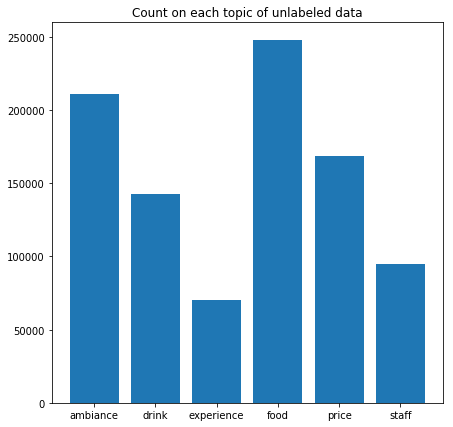

In [0]:
plt.figure(figsize = (7,7))
plt.bar(topic_summarize["aspect"], topic_summarize["token"])
plt.title('Count on each topic of unlabeled data')
plt.show()

In [0]:
unlabeled_df_split_asp[unlabeled_df_split_asp["aspect"] == 'staff']


id  ...                                                                                   token_no_stop_word
6             0  ...                                                       [ph·ª•c_v·ª•, ni·ªÅm_n·ªü, ch√†o_ƒë√≥n, ph·ª•c_v·ª•, chu_ƒë√°o]
8             0  ...                                                                    [n√≥i, h√†i_l√≤ng, th·ªãt, m·ªÅm, juicy]
9             0  ...                                                    [th√™m, kho·∫£n, tendeloin, b√≤, m·ªÅm, ph·∫£i_bi·∫øt, nha]
13            1  ...                                                                                [gi·ªØ, xe, nhi·ªát_t√¨nh]
18            1  ...                                                                     [c√∫p, ƒëi·ªán, nh√¢n_vi√™n, ƒë·ªët, n·∫øn]
73            8  ...                                                                  [m·∫•y, anh, nv, ·ªü, vui_v·∫ª, t·∫≠n_t√¨nh]
76            9  ...                                                                              [nh√¢n_vi√™n, nhi·ªát_t√¨nh]
92           12  ...                                   [ph·ª•c_v·ª•, nhanh, l·∫π, ch·∫Øc, ƒëi, bu·ªïi, tr∆∞a, ai, k√®m, ch√©n, s√∫p, ok]
106          14  ...                                                                               [qu√°n, ƒëi·ªÅu_ho√†, n√≥ng]
113          15  ...                                                                   [nh√¢n_vi√™n, nhi·ªát_t√¨nh, d·ªÖ_th∆∞∆°ng]
157          19  ...                                                           [nh√¢n_vi√™n, qu√°n, c·ª±c_k·ª≥, d·ªÖ_th∆∞∆°ng, lu√¥n]
160          20  ...                                                                      [nh√¢n_vi√™n, vui_v·∫ª, n√≥i, nhi·ªÅu]
184          23  ...                                              [h·ª£p, t√∫i_ti·ªÅn, nh√¢n_vi√™n, nhi·ªát_t√¨nh, chu_ƒë√°o, vui_v·∫ª]
206          26  ...                                             [nh√¢n_vi√™n, ph·ª•c_v·ª•, nhi·ªát_t√¨nh, chu_ƒë√°o, ƒë·ª£i, m√≥n, l√¢u]
233          31  ...                                                                                   [ph·ª•c_v·ª•, chu_ƒë√°o]
234          32  ...                                                            [ƒëi, ƒÉn, bu·ªïi, chi·ªÅu, ƒë√¥ng, d·ªÖ, s·ª£, lu√¥n]
235          32  ...                               [m√≥n, ch·∫≠m, mi·ªÖn, b√†n, c√≥_ƒëi·ªÅu, m·∫•y, anh_ch·ªã, ph·ª•c_v·ª•, d·ªÖ_th∆∞∆°ng, nh√©]
247          33  ...  [nh√†_h√†ng, nu√≥ng, kh√≥i, nh√¨n, kh√≥i, m√π_m·ªãt, nh∆∞_v·∫≠y, t·ªõi, gi·∫£i_th√≠ch, kh√°ch, c√°ch, n∆∞·ªõng, sai, _...
254          33  ...                                                                               [quan_t√¢m, kh√°ch, t·ªët]
285          38  ...                                                                              [nh√¢n_vi√™n, th√¢n_thi·ªán]
311          39  ...                                                                               [duy, ship, ch·∫≠m, coi]
326          40  ...                                                                                    [giao, h√†ng, t·∫°m]
330          41  ...                                                                [nh√¢n_vi√™n, ph·ª•c_v·ª•, c·ª±c_k√¨, chu_ƒë√°o]
331          41  ...                                                                        [th√°i_ƒë·ªô, vui_v·∫ª, th√¢n_thi·ªán]
332          41  ...                           [ch·∫•m, ƒëi·ªÉm_cao, c√°ch, ph·ª•c_v·ª•, nh√¢n_vi√™n, ·ªü, m√≥n, ƒÉn, trang_tr√≠, ƒë·∫πp_m·∫Øt]
348          43  ...                                                            [nh√¢n_vi√™n, nh√†_h√†ng, nhi·ªát_t√¨nh, vui_v·∫ª]
351          43  ...                                                                            [m√≥n, ƒÉn, ph·ª•c_v·ª•, nhanh]
377          47  ...                                     [nh√¢n_vi√™n, ph·ª•c_v·ª•, nhi·ªát_t√¨nh, ch·ªã, ch·ªß, qu√°n, max, xinh, g√°i]
384          50  ...                                                                 [ƒëi, cu·ªëi, tu·∫ßn, ·ªìn, gi√°_c·∫£, h·ª£p_l√Ω]
423          54  ...                           

In [0]:
ViPosTagger.postagging('xen_k·∫Ω l√† l·ªõp b√°nh brownie')

(['xen_k·∫Ω', 'l√†', 'l·ªõp', 'b√°nh', 'brownie'], ['V', 'V', 'N', 'N', 'A'])